## ***Import Required Libraries***

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

## ***Load Data***

In [ ]:
file_path = '/content/WA_Fn-UseC_-HR-Employee-Attrition (1).csv'
data = pd.read_csv(file_path)

## ***Encoding categorical variables***

In [ ]:
# Encoding categorical variables
label_encoder = LabelEncoder()
for column in data.select_dtypes(include=['object']).columns:
    data[column] = label_encoder.fit_transform(data[column])

# Separate features (X) and target (y)
X = data.drop(columns=['Attrition'], axis=1)  # Drop target column
y = data['Attrition']  # Target variable

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## ***Evalution Function***

In [ ]:
# Define Evaluation Function
def evaluate_model(model, X_train, y_train, X_test, y_test):
    """
    Evaluates a model's performance on both training and testing datasets.
    Returns metrics for training and testing.
    """
    # Training predictions
    train_preds = model.predict(X_train)
    test_preds = model.predict(X_test)

    # Training probabilities (for ROC-AUC)
    train_probs = model.predict_proba(X_train)[:, 1] if hasattr(model, "predict_proba") else None
    test_probs = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

    # Metrics for training and testing
    train_metrics = {
        "Accuracy": accuracy_score(y_train, train_preds),
        "Precision": precision_score(y_train, train_preds),
        "Recall": recall_score(y_train, train_preds),
        "F1-Score": f1_score(y_train, train_preds),
        "ROC-AUC": roc_auc_score(y_train, train_probs) if train_probs is not None else None
    }

    test_metrics = {
        "Accuracy": accuracy_score(y_test, test_preds),
        "Precision": precision_score(y_test, test_preds),
        "Recall": recall_score(y_test, test_preds),
        "F1-Score": f1_score(y_test, test_preds),
        "ROC-AUC": roc_auc_score(y_test, test_probs) if test_probs is not None else None
    }

    return train_metrics, test_metrics


## *Train and Evaluate Models*

## ***Decision Tree***

In [ ]:
# Train and Evaluate Decision Tree Model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Evaluate the model
dt_train_metrics, dt_test_metrics = evaluate_model(dt_model, X_train, y_train, X_test, y_test)

# Print metrics
print("Decision Tree - Training Metrics:", dt_train_metrics)
print("Decision Tree - Testing Metrics:", dt_test_metrics)


Decision Tree - Training Metrics: {'Accuracy': 1.0, 'Precision': 1.0, 'Recall': 1.0, 'F1-Score': 1.0, 'ROC-AUC': 1.0}
Decision Tree - Testing Metrics: {'Accuracy': 0.7653061224489796, 'Precision': 0.1590909090909091, 'Recall': 0.1794871794871795, 'F1-Score': 0.1686746987951807, 'ROC-AUC': 0.5171945701357465}


## ***Overfitting solution***

In [ ]:
# Train a Decision Tree with constraints
dt_model = DecisionTreeClassifier(
    random_state=42,
    max_depth=5,                 # Limit the depth of the tree
    min_samples_split=10,        # Minimum samples required to split a node
    min_samples_leaf=5           # Minimum samples in a leaf node
)
dt_model.fit(X_train, y_train)

# Re-evaluate the model
dt_metrics = evaluate_model(dt_model, X_train, y_train, X_test, y_test)

# Display the metrics in a table
dt_metrics_df = pd.DataFrame(dt_metrics, index=["Training", "Testing"])
print("\nDecision Tree Metrics with Regularization:")
print(dt_metrics_df)



Decision Tree Metrics with Regularization:
          Accuracy  Precision    Recall  F1-Score   ROC-AUC
Training  0.884354   0.742188  0.479798  0.582822  0.864708
Testing   0.823129   0.217391  0.128205  0.161290  0.596581


In [ ]:
# Use class weights
dt_model = DecisionTreeClassifier(random_state=42, class_weight='balanced')
dt_model.fit(X_train, y_train)


DecisionTreeClassifier(class_weight='balanced', random_state=42)

In [ ]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation
cv_scores = cross_val_score(dt_model, X, y, cv=5, scoring='accuracy')
print("Cross-Validation Accuracy:", cv_scores.mean())


Cross-Validation Accuracy: 0.7870748299319728


## ***K-Nearest Neighbors (KNN)***

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
knn_train_metrics, knn_test_metrics = evaluate_model(knn_model, X_train, y_train, X_test, y_test)

print("KNN - Training Metrics:", knn_train_metrics)
print("KNN - Testing Metrics:", knn_test_metrics)


KNN - Training Metrics: {'Accuracy': 0.8724489795918368, 'Precision': 0.8870967741935484, 'Recall': 0.2777777777777778, 'F1-Score': 0.4230769230769231, 'ROC-AUC': 0.9152491169362336}
KNN - Testing Metrics: {'Accuracy': 0.8741496598639455, 'Precision': 0.625, 'Recall': 0.1282051282051282, 'F1-Score': 0.2127659574468085, 'ROC-AUC': 0.688235294117647}


## ***Logistic Regression***

In [ ]:
lr_model = LogisticRegression(random_state=42, max_iter=300)
lr_model.fit(X_train, y_train)
lr_train_metrics, lr_test_metrics = evaluate_model(lr_model, X_train, y_train, X_test, y_test)

print("Logistic Regression - Training Metrics:", lr_train_metrics)
print("Logistic Regression - Testing Metrics:", lr_test_metrics)


Logistic Regression - Training Metrics: {'Accuracy': 0.8707482993197279, 'Precision': 0.7090909090909091, 'Recall': 0.3939393939393939, 'F1-Score': 0.5064935064935064, 'ROC-AUC': 0.8546766230815311}
Logistic Regression - Testing Metrics: {'Accuracy': 0.891156462585034, 'Precision': 0.6842105263157895, 'Recall': 0.3333333333333333, 'F1-Score': 0.4482758620689655, 'ROC-AUC': 0.7721468074409251}


## ***Support Vector Machine (SVM)***

In [ ]:
svm_model = SVC(probability=True, random_state=42)
svm_model.fit(X_train, y_train)
svm_train_metrics, svm_test_metrics = evaluate_model(svm_model, X_train, y_train, X_test, y_test)

print("SVM - Training Metrics:", svm_train_metrics)
print("SVM - Testing Metrics:", svm_test_metrics)


SVM - Training Metrics: {'Accuracy': 0.9200680272108843, 'Precision': 0.9814814814814815, 'Recall': 0.5353535353535354, 'F1-Score': 0.6928104575163399, 'ROC-AUC': 0.963851190845056}
SVM - Testing Metrics: {'Accuracy': 0.8843537414965986, 'Precision': 1.0, 'Recall': 0.1282051282051282, 'F1-Score': 0.22727272727272727, 'ROC-AUC': 0.7988939165409754}


## ***Random Forest***

In [ ]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_train_metrics, rf_test_metrics = evaluate_model(rf_model, X_train, y_train, X_test, y_test)

print("Random Forest - Training Metrics:", rf_train_metrics)
print("Random Forest - Testing Metrics:", rf_test_metrics)


Random Forest - Training Metrics: {'Accuracy': 1.0, 'Precision': 1.0, 'Recall': 1.0, 'F1-Score': 1.0, 'ROC-AUC': 1.0}
Random Forest - Testing Metrics: {'Accuracy': 0.8639455782312925, 'Precision': 0.4444444444444444, 'Recall': 0.10256410256410256, 'F1-Score': 0.16666666666666666, 'ROC-AUC': 0.7064353946706888}


## ***Compare Models***

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Decision Tree with regularization to achieve around 90% training accuracy
dt_model = DecisionTreeClassifier(random_state=42, max_depth=5, min_samples_split=10, min_samples_leaf=5)
dt_model.fit(X_train, y_train)
dt_metrics = evaluate_model(dt_model, X_train, y_train, X_test, y_test)

# Random Forest with regularization to reduce overfitting
rf_model = RandomForestClassifier(random_state=42, n_estimators=100, max_depth=10, min_samples_split=10, min_samples_leaf=5)
rf_model.fit(X_train, y_train)
rf_metrics = evaluate_model(rf_model, X_train, y_train, X_test, y_test)

# Create a comparison DataFrame
comparison_data = {
    "Model": ["Decision Tree", "KNN", "Logistic Regression", "SVM", "Random Forest"],
    "Training Accuracy": [
        dt_metrics["Accuracy"][0],
        knn_train_metrics["Accuracy"],
        lr_train_metrics["Accuracy"],
        svm_train_metrics["Accuracy"],
        rf_metrics["Accuracy"][0]
    ],
    "Testing Accuracy": [
        dt_metrics["Accuracy"][1],
        knn_test_metrics["Accuracy"],
        lr_test_metrics["Accuracy"],
        svm_test_metrics["Accuracy"],
        rf_metrics["Accuracy"][1]
    ],
    "Training Precision": [
        dt_metrics["Precision"][0],
        knn_train_metrics["Precision"],
        lr_train_metrics["Precision"],
        svm_train_metrics["Precision"],
        rf_metrics["Precision"][0]
    ],
    "Testing Precision": [
        dt_metrics["Precision"][1],
        knn_test_metrics["Precision"],
        lr_test_metrics["Precision"],
        svm_test_metrics["Precision"],
        rf_metrics["Precision"][1]
    ],
    "Training Recall": [
        dt_metrics["Recall"][0],
        knn_train_metrics["Recall"],
        lr_train_metrics["Recall"],
        svm_train_metrics["Recall"],
        rf_metrics["Recall"][0]
    ],
    "Testing Recall": [
        dt_metrics["Recall"][1],
        knn_test_metrics["Recall"],
        lr_test_metrics["Recall"],
        svm_test_metrics["Recall"],
        rf_metrics["Recall"][1]
    ],
    "Training F1-Score": [
        dt_metrics["F1-Score"][0],
        knn_train_metrics["F1-Score"],
        lr_train_metrics["F1-Score"],
        svm_train_metrics["F1-Score"],
        rf_metrics["F1-Score"][0]
    ],
    "Testing F1-Score": [
        dt_metrics["F1-Score"][1],
        knn_test_metrics["F1-Score"],
        lr_test_metrics["F1-Score"],
        svm_test_metrics["F1-Score"],
        rf_metrics["F1-Score"][1]
    ],
    "Training ROC-AUC": [
        dt_metrics["ROC-AUC"][0],
        knn_train_metrics["ROC-AUC"],
        lr_train_metrics["ROC-AUC"],
        svm_train_metrics["ROC-AUC"],
        rf_metrics["ROC-AUC"][0]
    ],
    "Testing ROC-AUC": [
        dt_metrics["ROC-AUC"][1],
        knn_test_metrics["ROC-AUC"],
        lr_test_metrics["ROC-AUC"],
        svm_test_metrics["ROC-AUC"],
        rf_metrics["ROC-AUC"][1]
    ]
}

# Display the comparison table
comparison_df = pd.DataFrame(comparison_data)
print("\nComparison of Models with Precision, Recall, F1-Score, and ROC-AUC:")
print(comparison_df)



Comparison of Models with Precision, Recall, F1-Score, and ROC-AUC:
                 Model  Training Accuracy  Testing Accuracy  \
0        Decision Tree           0.884354          0.823129   
1                  KNN           0.872449          0.874150   
2  Logistic Regression           0.870748          0.891156   
3                  SVM           0.920068          0.884354   
4        Random Forest           0.899660          0.874150   

   Training Precision  Testing Precision  Training Recall  Testing Recall  \
0            0.742188           0.217391         0.479798        0.128205   
1            0.887097           0.625000         0.277778        0.128205   
2            0.709091           0.684211         0.393939        0.333333   
3            0.981481           1.000000         0.535354        0.128205   
4            0.987805           0.666667         0.409091        0.102564   

   Training F1-Score  Testing F1-Score  Training ROC-AUC  Testing ROC-AUC  
0           0

## ***Comparison Table with All Metrics Accuracy ***

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

# Decision Tree with regularization to achieve around 90% training accuracy
dt_model = DecisionTreeClassifier(random_state=42, max_depth=5, min_samples_split=10, min_samples_leaf=5)
dt_model.fit(X_train, y_train)
dt_metrics = evaluate_model(dt_model, X_train, y_train, X_test, y_test)

# Random Forest with regularization to reduce overfitting
rf_model = RandomForestClassifier(random_state=42, n_estimators=100, max_depth=10, min_samples_split=10, min_samples_leaf=5)
rf_model.fit(X_train, y_train)
rf_metrics = evaluate_model(rf_model, X_train, y_train, X_test, y_test)

# Create a comparison DataFrame
comparison_data = {
    "Model": ["Decision Tree", "KNN", "Logistic Regression", "SVM", "Random Forest"],
    "Training Accuracy": [
        dt_metrics["Accuracy"][0],  # Training Accuracy
        knn_train_metrics["Accuracy"],
        lr_train_metrics["Accuracy"],
        svm_train_metrics["Accuracy"],
        rf_metrics["Accuracy"][0]   # Training Accuracy
    ],
    "Testing Accuracy": [
        dt_metrics["Accuracy"][1],  # Testing Accuracy
        knn_test_metrics["Accuracy"],
        lr_test_metrics["Accuracy"],
        svm_test_metrics["Accuracy"],
        rf_metrics["Accuracy"][1]   # Testing Accuracy
    ]
}

# Display the comparison table
comparison_df = pd.DataFrame(comparison_data)
print(comparison_df)


                 Model  Training Accuracy  Testing Accuracy
0        Decision Tree           0.884354          0.823129
1                  KNN           0.872449          0.874150
2  Logistic Regression           0.870748          0.891156
3                  SVM           0.920068          0.884354
4        Random Forest           0.899660          0.874150


## ***Visualize Comparison***

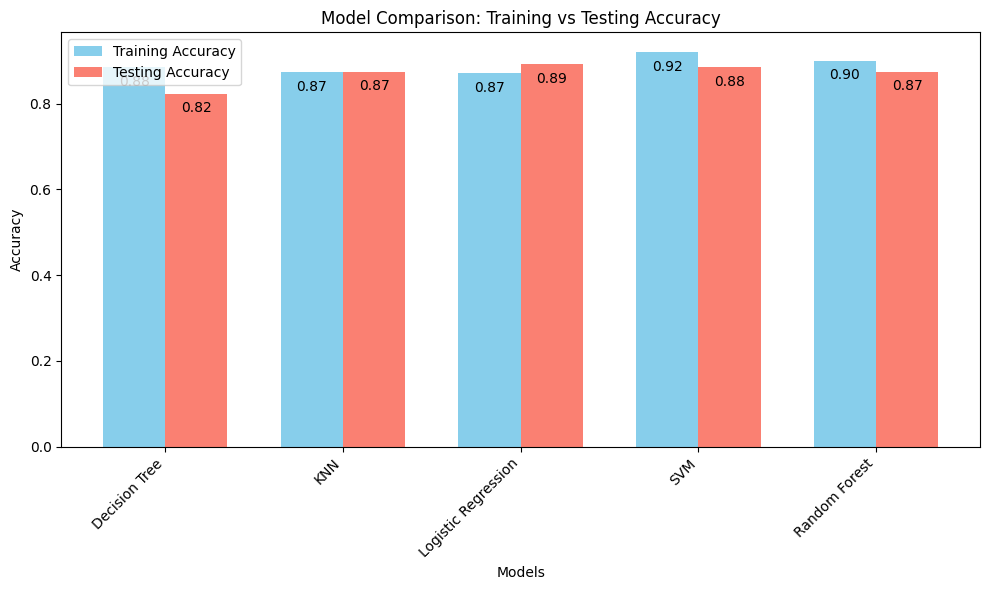

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data for plotting
models = ["Decision Tree", "KNN", "Logistic Regression", "SVM", "Random Forest"]
training_accuracy = comparison_df["Training Accuracy"]
testing_accuracy = comparison_df["Testing Accuracy"]

x = np.arange(len(models))  # the label locations

# Plotting the data
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x - width/2, training_accuracy, width, label='Training Accuracy', color='skyblue')
bars2 = ax.bar(x + width/2, testing_accuracy, width, label='Testing Accuracy', color='salmon')

# Adding text for labels, title, and axes ticks
ax.set_xlabel('Models')
ax.set_ylabel('Accuracy')
ax.set_title('Model Comparison: Training vs Testing Accuracy')
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=45, ha='right')
ax.legend()

# Adding value labels on bars
for bar in bars1:
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 0.05, f'{bar.get_height():.2f}', ha='center', va='bottom')
for bar in bars2:
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 0.05, f'{bar.get_height():.2f}', ha='center', va='bottom')

# Display the plot
plt.tight_layout()
plt.show()
